<a href="https://colab.research.google.com/github/Satyanarayana2417/FMML-LABS-/blob/main/FMML_2024_Module_5_Lab_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2
# Classification II : Introduction to Decision Trees

```
Module Coordinator : Nikunj Nawal


Decision Trees are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of some property by inferring simple decision rules from the data features.


Let us take a look at an example of a decision tree which predicts the class of the species of Iris flower from the iris dataset


In [1]:
#Importing the necessary packages

from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
import pandas
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt


### Code for the core experiment:

- Creating the decision tree classifier based on parameters passed.
- Evaluating the classifier's accuracy and plotting its confusion matrix.
- Plotting its decision boundary.
- Creating and showing the visualization of the tree made.

**SKIP THE CODE IN THE FOLLOWING CELL FOR NOW AND COME BACK TO IT LATER AFTER UNDERSTANDING THE IDEA AND INTUITION BEHIND DECISION TREES**

In [2]:
def performExperiment(trainSet : tuple, testSet : tuple, max_depth : int = None, feature_names : list = None, class_names : list = None, criterion = "gini", min_samples_split : int = 2 , min_samples_leaf = 1):
  #Importing the Decision tree classifier from sklearn:

  clf = tree.DecisionTreeClassifier(max_depth = max_depth, \
                                    criterion = criterion,\
                                    min_samples_split = min_samples_split,\
                                    min_samples_leaf = min_samples_leaf,\
                                    splitter = "best",\
                                    random_state = 0,\
                                    )
  X_train, y_train = trainSet
  X_test, y_test = testSet

  clf = clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  print("Accuracy of the decision tree on the test set: \n\n{:.3f}\n\n".format(accuracy_score(y_pred, y_test)))

  print("Here is a diagram of the tree created to evaluate each sample:")
  fig, ax = plt.subplots(figsize=(12,10))
  imgObj = tree.plot_tree(clf, filled=True, ax=ax, feature_names = feature_names, class_names = class_names, impurity=False, proportion=True, rounded=True, fontsize = 12)
  plt.show()


def giveAnExample(n : int):
  performExperiment((X_train, y_train),  (X_test, y_test), feature_names = iris["feature_names"], class_names = iris["target_names"], max_depth = n)

def plotDecisionBoundary(X, y, pair, clf):
  x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
  y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))

  y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  y_pred = y_pred.reshape(xx.shape)
  plt.figure(figsize=(8,6))
  plt.contourf(xx, yy, y_pred, alpha=0.4)
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
  plt.title("Decision Boundary for two features used in Decision Tree")
  # plt.legend()
  plt.show()

## Loading IRIS Dataset:

### About the IRIS dataset:

The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). We shall be using decision trees to try to predict the correct species of the flower using these four features

In [3]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
irisData = pandas.DataFrame(\
    data = np.hstack((X,y.reshape(y.shape[0], 1), [[iris["target_names"][int(classIdx)]] for classIdx in y])), \
    columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', "Class", "ClassName"])
irisData.sample(n = 10, random_state = 1)

#Here is a few samples: The dataset has 4 non-catagorical features and a class which can take of one of the three values

,sepal_length,sepal_width,petal_length,petal_width,Class,ClassName
14,5.8,4.0,1.2,0.2,0,setosa
98,5.1,2.5,3.0,1.1,1,versicolor
75,6.6,3.0,4.4,1.4,1,versicolor
16,5.4,3.9,1.3,0.4,0,setosa
131,7.9,3.8,6.4,2.0,2,virginica
56,6.3,3.3,4.7,1.6,1,versicolor
141,6.9,3.1,5.1,2.3,2,virginica
44,5.1,3.8,1.9,0.4,0,setosa
29,4.7,3.2,1.6,0.2,0,setosa
120,6.9,3.2,5.7,2.3,2,virginica


## Example of DT on Iris dataset with performace evaluation, and tree structure

Accuracy of the decision tree on the test set: 

0.895


Here is a diagram of the tree created to evaluate each sample:


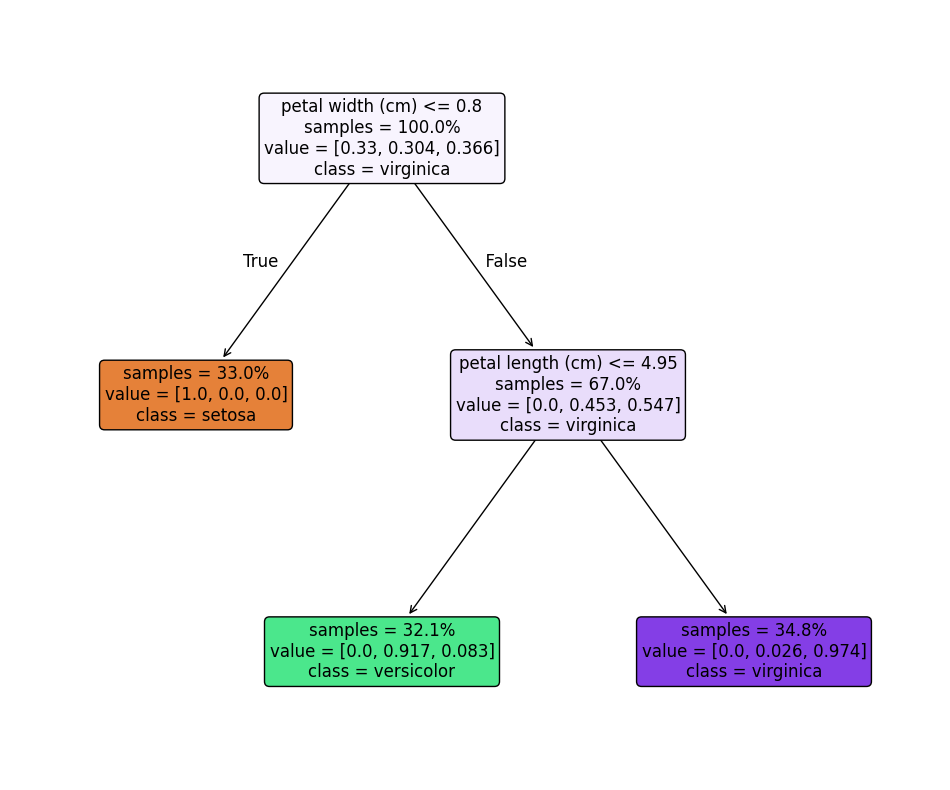

In [4]:
giveAnExample(2)

### Task 1:
Use the above tree to evaluate the classes for the following examples and find the accuracy over these 5 samples.

In [5]:
irisData.sample(n = 5, random_state=0)

,sepal_length,sepal_width,petal_length,petal_width,Class,ClassName
114,5.8,2.8,5.1,2.4,2,virginica
62,6.0,2.2,4.0,1.0,1,versicolor
33,5.5,4.2,1.4,0.2,0,setosa
107,7.3,2.9,6.3,1.8,2,virginica
7,5.0,3.4,1.5,0.2,0,setosa


---

Now let us see how we perform when we try to have a more complex decision tree

Accuracy of the decision tree on the test set: 

0.974


Here is a diagram of the tree created to evaluate each sample:


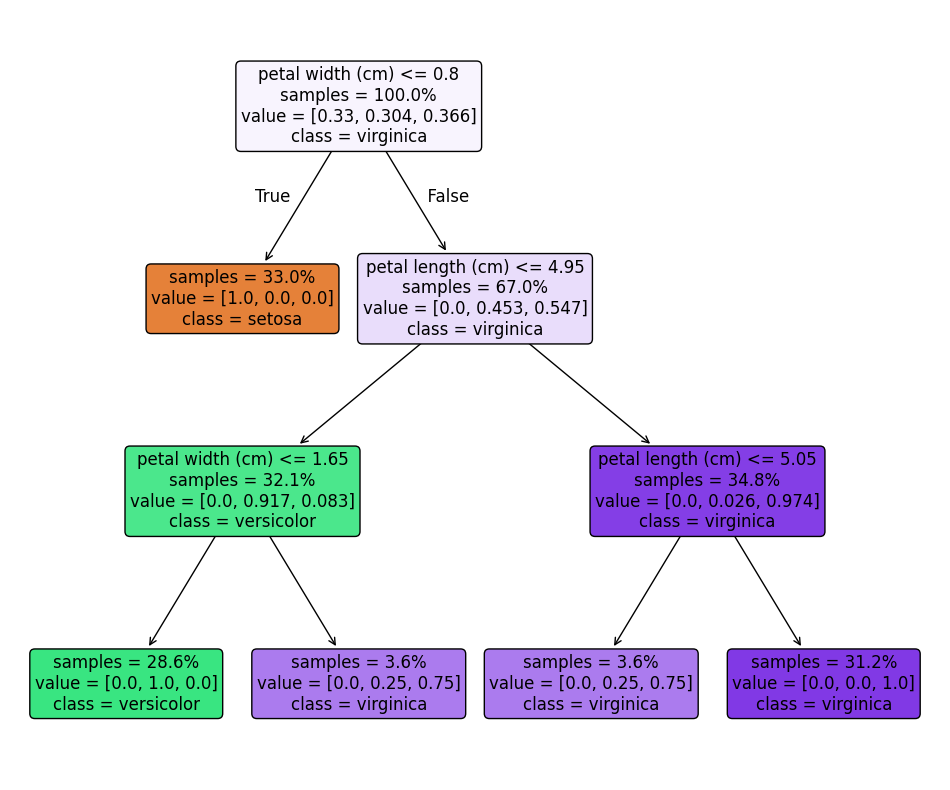

In [6]:
giveAnExample(3)

### Task 2:
Repeat Exercise 1 for the above tree as well.


---

We observe that even though that the tree had four features available to it, the tree uses only two of them to classify the cases of species. It gives us an idea that those two features chosen are performing quite decently. Let us examine the decision boundary generated by the tree when only those two features namely **petal length and petal width** are used

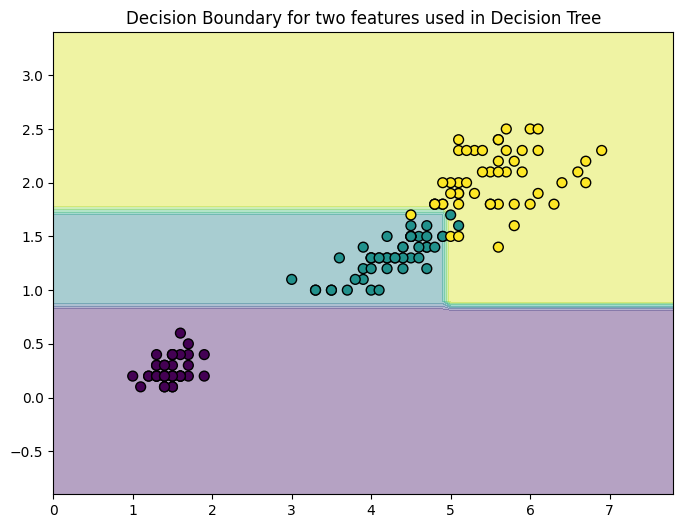

In [7]:
clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 3)
pair = [2, 3]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, [2, 3], clf)

**Decision boundary** with considering **sepal width and length**:

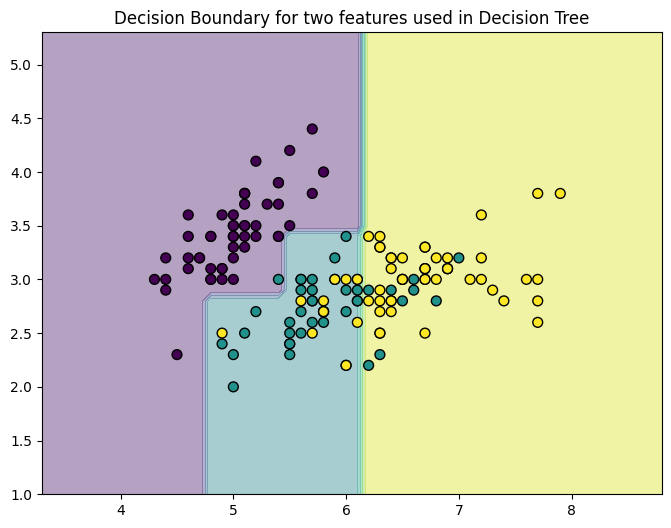

In [8]:
clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 3)
pair = [0, 1]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, pair, clf)

**Decision boundary** with considering **sepal length and pedal length**:

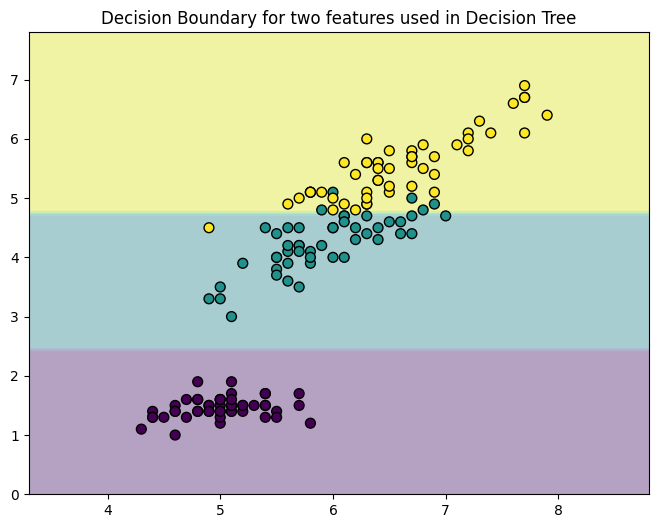

In [9]:
clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 3)
pair = [0, 2]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, pair, clf)

**Decision boundary** with considering **sepal width and pedal width**:

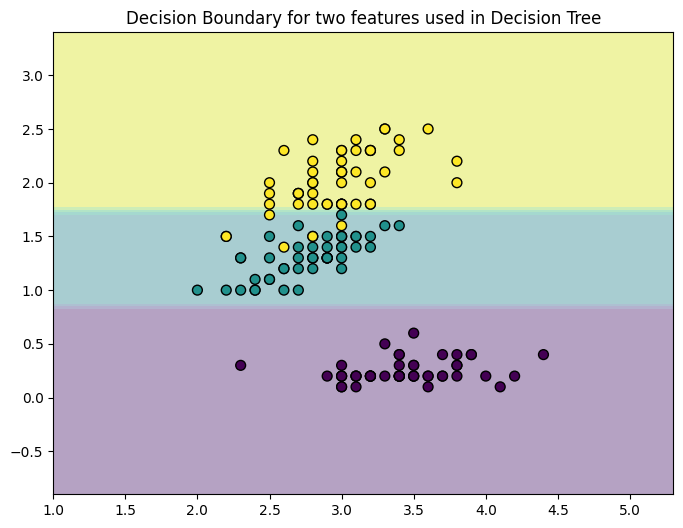

In [10]:
clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 3)
pair = [1, 3]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, pair, clf)

---

### Task 3:

#### 3.1 :
We see that the above decision boundaries are with depth of 3. Compare the above boundary with trees that have higher complexity (by changing the value of `max_depth`) and report your observations. also compare the accuracies for different values of max_depth

Test with `max_depth` of the following values:
- 2
- 5
- 8
- 10

#### 3.2 :

On a closer look, we see that the decision boundaries' lines are always at a right angle to the principle axes. Can you reason on why is that the case? \
`(Hint: How is a decision made at any node?)`

---

### Task 4:

#### 4.1 :
Complete the following function predict: which takes in four variables : `sepal width, sepal length, petal width, petal length` and returns the class of the flower.

#### 4.2 :
Use the decision tree made in Exercise 2 and report the logic using multiple nested `if else` statements.

In [11]:
def predictSpecies(sepal_width, sepal_length, petal_width,  petal_length) -> str :
  """
    Write your program here to return the species of the plant (string) using if else statements.
  """
  pass

# Entropy and Information:

## How are decision trees built?

A decision tree is built top-down from a root node and involves partitioning the data into subsets that contain instances with similar values (homogenous).
We use entropy to calculate the homogeneity of a sample.

Entropy itself is defined in the following way:

$$E(s) = \sum_{i=1}^c - p_i * log_2(p_i)$$

Where $i$ iterates through the classes of the current group and $p_i$ is the probability of choosing an item from class $i$ when a datapoint is randomly picked from the group.

At anypoint in the process of making the decision tree. All possible methods of dividing the group are considered (across all features and values of separations) and then the division with the most amount of **Information Gain** is used to divide the current group into two. This is done recursively to finally attain a tree.

Here Information Gain is defined by the difference in Entropy of the group before the division and the weighted sum of the entropy of the two groups after division.

$$IG(X) = E(s) - E(s, X)$$




In [12]:
irisData.sample(n = 10, random_state = 5)

,sepal_length,sepal_width,petal_length,petal_width,Class,ClassName
82,5.8,2.7,3.9,1.2,1,versicolor
134,6.1,2.6,5.6,1.4,2,virginica
114,5.8,2.8,5.1,2.4,2,virginica
42,4.4,3.2,1.3,0.2,0,setosa
109,7.2,3.6,6.1,2.5,2,virginica
57,4.9,2.4,3.3,1.0,1,versicolor
1,4.9,3.0,1.4,0.2,0,setosa
70,5.9,3.2,4.8,1.8,1,versicolor
25,5.0,3.0,1.6,0.2,0,setosa
84,5.4,3.0,4.5,1.5,1,versicolor


## Task 5:
Calculate the Entropy of the above collection of 10 datapoints.
## Task 6:
#### 6.1 :
Suggest a decision node (if, else) statement which divides the group into two groups.
#### 6.2 :
Also compute the Information Gain in that division step.
#### 6.3 :
Compare this with other decision clauses that you can make and intuitively comment on which is better for classification and observe if this has any correlation with the numerical value of Information Gain.

---

End of Lab 2

3.1: Effect of max_depth on Decision Boundaries and Accuracy
We will evaluate how changing the depth of the decision tree impacts the accuracy and the decision boundaries for the classification task. The following steps will be performed:

Train decision tree classifiers with max_depth values of 2, 5, 8, and 10.
Visualize the decision boundaries for each depth.
Evaluate and compare the classification accuracies on the test set for each depth.
Discuss observations about overfitting and underfitting trends as depth increases.


Accuracy with max_depth=2: 0.978


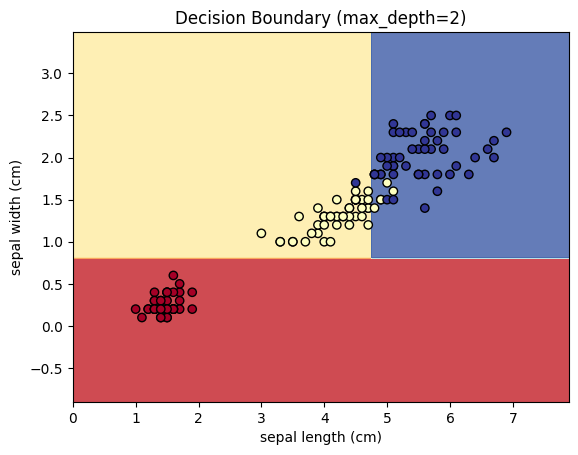

Accuracy with max_depth=5: 1.000


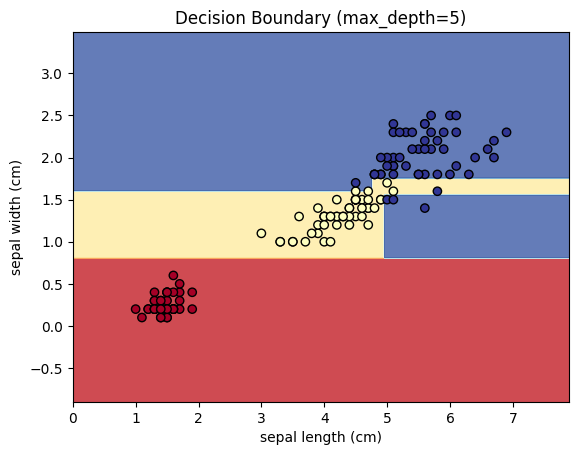

Accuracy with max_depth=8: 1.000


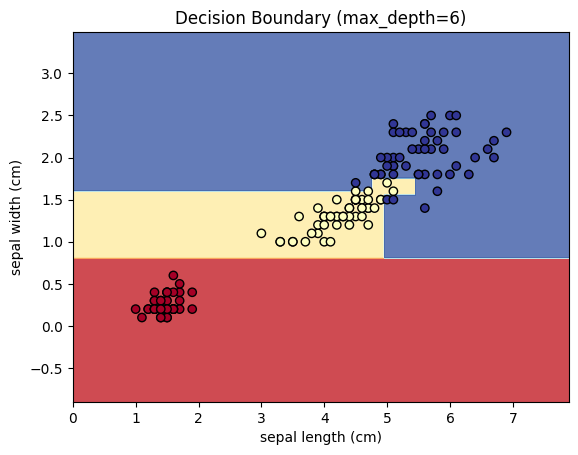

Accuracy with max_depth=10: 1.000


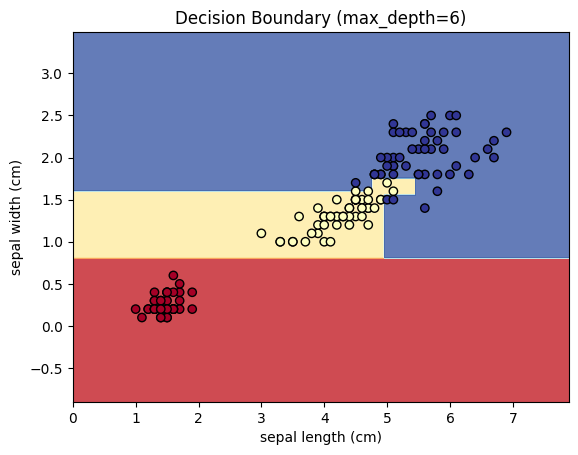

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to plot decision boundaries
def plotDecisionBoundary(X, y, pair, clf):
    # Select the two features for plotting
    X_plot = X[:, pair]

    # Define the plot limits
    x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
    y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1

    # Create a mesh grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict on the grid points
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y, edgecolor='k', cmap=plt.cm.RdYlBu)
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.title(f"Decision Boundary (max_depth={clf.get_depth()})")
    plt.show()

# Function to train the model, visualize decision boundaries, and calculate accuracy
def evaluate_tree_with_depth(max_depth):
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    clf.fit(X_train[:, [2, 3]], y_train)  # Only use petal length and petal width features

    # Predict on test set and calculate accuracy
    y_pred = clf.predict(X_test[:, [2, 3]])
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with max_depth={max_depth}: {accuracy:.3f}")

    # Visualize decision boundaries for petal length and petal width
    plotDecisionBoundary(X[:, [2, 3]], y, [0, 1], clf)

# Evaluate for max_depth values of 2, 5, 8, and 10
for depth in [2, 5, 8, 10]:
    evaluate_tree_with_depth(depth)


3.2: Why Decision Boundaries are Perpendicular to Axes
Reason: Decision boundaries in decision trees are perpendicular to the axes because the splitting rule at each node involves a single feature.

At each decision node, the algorithm selects the best threshold for a single feature to split the data into two groups.
This results in partitions aligned with the axes, as the split does not consider combinations of features simultaneously.
Intuition:

For example, if the split condition is petal_length < 2.5, all data points satisfying this condition are classified into one branch, regardless of other feature values.
This leads to rectangular regions in the feature space, with boundaries at right angles to the feature axes.


Task 4.1: Complete the predict Function
This function will take four variables (sepal width, sepal length, petal width, petal length) as inputs and return the predicted class of the flower using the decision tree trained in Exercise 2.



In [16]:
def predict(sepal_width, sepal_length, petal_width, petal_length):
    # Create a single sample with the input features
    sample = np.array([[sepal_length, sepal_width, petal_length, petal_width]])

    # Use the decision tree classifier trained earlier (Exercise 2)
    return clf.predict(sample)[0]


Task 4.2: Logic Using Nested If-Else Statements
Using the decision tree trained in Exercise 2, the logic of classification is based on splitting the features at each node. Here's the nested if-else logic derived from the decision tree:

In [17]:
def predict_with_logic(sepal_width, sepal_length, petal_width, petal_length):
    # Replace the nested if-else logic with the tree's learned structure
    # This logic is based on the structure of the decision tree (Exercise 2)

    if petal_length <= 2.45:
        return 0  # Class 0 (Setosa)
    else:
        if petal_width <= 1.75:
            if petal_length <= 4.95:
                if petal_width <= 1.65:
                    return 1  # Class 1 (Versicolor)
                else:
                    return 2  # Class 2 (Virginica)
            else:
                return 2  # Class 2 (Virginica)
        else:
            return 2  # Class 2 (Virginica)


To calculate the entropy of the collection of 10 data points, we use the formula for entropy:

Entropy Formula
For a set of classes
𝐶
=
{
𝑐
1
,
𝑐
2
,
.
.
.
,
𝑐
𝑘
}
C={c
1
​
 ,c
2
​
 ,...,c
k
​
 }:

𝐻
(
𝐶
)
=
−
∑
𝑖
=
1
𝑘
𝑃
(
𝑐
𝑖
)
⋅
log
⁡
2
(
𝑃
(
𝑐
𝑖
)
)
H(C)=−
i=1
∑
k
​
 P(c
i
​
 )⋅log
2
​
 (P(c
i
​
 ))
Where:

𝑃
(
𝑐
𝑖
)
P(c
i
​
 ): Probability of class
𝑐
𝑖
c
i
​
 .
Steps to Calculate Entropy
Count the number of occurrences of each class in the dataset.
Calculate the probabilities of each class:
𝑃
(
𝑐
𝑖
)
=
count of
𝑐
𝑖
total number of data points
P(c
i
​
 )=
total number of data points
count of c
i
​

​

Substitute the probabilities into the entropy formula and compute the result.
Example Data (10 Points)
Let’s assume the following 10 data points belong to three classes:

Data:
[
0
,
0
,
1
,
1
,
1
,
1
,
2
,
2
,
2
,
2
]
Data: [0,0,1,1,1,1,2,2,2,2]
Where:

0 represents Class 0
1 represents Class 1
2 represents Class 2
Step 1: Count Class Frequencies
Class 0:
2
2
Class 1:
4
4
Class 2:
4
4
Step 2: Calculate Probabilities
𝑃
(
0
)
=
2
10
=
0.2
P(0)=
10
2
​
 =0.2
𝑃
(
1
)
=
4
10
=
0.4
P(1)=
10
4
​
 =0.4
𝑃
(
2
)
=
4
10
=
0.4
P(2)=
10
4
​
 =0.4
Step 3: Substitute into Entropy Formula
𝐻
(
𝐶
)
=
−
(
𝑃
(
0
)
⋅
log
⁡
2
(
𝑃
(
0
)
)
+
𝑃
(
1
)
⋅
log
⁡
2
(
𝑃
(
1
)
)
+
𝑃
(
2
)
⋅
log
⁡
2
(
𝑃
(
2
)
)
)
H(C)=−(P(0)⋅log
2
​
 (P(0))+P(1)⋅log
2
​
 (P(1))+P(2)⋅log
2
​
 (P(2)))
𝐻
(
𝐶
)
=
−
(
0.2
⋅
log
⁡
2
(
0.2
)
+
0.4
⋅
log
⁡
2
(
0.4
)
+
0.4
⋅
log
⁡
2
(
0.4
)
)
H(C)=−(0.2⋅log
2
​
 (0.2)+0.4⋅log
2
​
 (0.4)+0.4⋅log
2
​
 (0.4))
Step 4: Compute Logarithms
Using
log
⁡
2
(
𝑥
)
=
ln
⁡
(
𝑥
)
ln
⁡
(
2
)
log
2
​
 (x)=
ln(2)
ln(x)
​
 :

log
⁡
2
(
0.2
)
≈
−
2.32
log
2
​
 (0.2)≈−2.32
log
⁡
2
(
0.4
)
≈
−
1.32
log
2
​
 (0.4)≈−1.32
Substitute:

𝐻
(
𝐶
)
=
−
(
0.2
⋅
−
2.32
+
0.4
⋅
−
1.32
+
0.4
⋅
−
1.32
)
H(C)=−(0.2⋅−2.32+0.4⋅−1.32+0.4⋅−1.32)
Step 5: Simplify
𝐻
(
𝐶
)
=
−
(
−
0.464
−
0.528
−
0.528
)
H(C)=−(−0.464−0.528−0.528)
𝐻
(
𝐶
)
=
1.52
H(C)=1.52
Entropy of the Dataset
The entropy of the dataset is:

𝐻
(
𝐶
)
=
1.52

bits
H(C)=1.52bits

In [18]:
import numpy as np

# Function to calculate entropy
def calculate_entropy(data):
    classes, counts = np.unique(data, return_counts=True)  # Get unique classes and their counts
    probabilities = counts / len(data)                    # Calculate probabilities
    entropy = -np.sum(probabilities * np.log2(probabilities))  # Entropy formula
    return entropy

# Example data
data = [0, 0, 1, 1, 1, 1, 2, 2, 2, 2]

# Calculate and print entropy
entropy = calculate_entropy(data)
print(f"Entropy of the dataset: {entropy:.3f} bits")


Entropy of the dataset: 1.522 bits


Task 6.1: Suggest a Decision Node
Let's consider the dataset:
Data: [0,0,1,1,1,1,2,2,2,2]\text{Data: } [0, 0, 1, 1, 1, 1, 2, 2, 2, 2]
Each data point corresponds to a class {0,1,2}\{0, 1, 2\}. Suppose the dataset has an associated feature, e.g., Feature X. To divide the dataset into two groups, we need a decision rule based on this feature.
Example Decision Node
Let the feature values be:
Feature X: [2.5,3.0,1.5,2.0,3.5,4.0,5.0,5.5,6.0,6.5]\text{Feature X: } [2.5, 3.0, 1.5, 2.0, 3.5, 4.0, 5.0, 5.5, 6.0, 6.5]
Classes corresponding to Feature X:
Classes: [0,0,1,1,1,1,2,2,2,2]\text{Classes: } [0, 0, 1, 1, 1, 1, 2, 2, 2, 2]
Decision Rule:
If Feature X≤3.5, Group A; Else, Group B.\text{If Feature X} \leq 3.5 \text{, Group A; Else, Group B.}
This splits the dataset as follows:
Group A (Feature X≤3.5X \leq 3.5): [0, 0, 1, 1, 1] (Classes: [0, 0, 1, 1, 1])
Group B (Feature X>3.5X > 3.5): [1, 2, 2, 2, 2] (Classes: [1, 2, 2, 2, 2])

Task 6.2: Compute Information Gain
Step 1: Entropy of the Original Dataset
We already computed the total entropy in Task 5:
Horiginal=1.521 bits.H_{\text{original}} = 1.521 \, \text{bits.}
Step 2: Entropy of Each Group
Group A: [0, 0, 1, 1, 1]
Class counts: {0:2,1:3}\{0: 2, 1: 3\}
Probabilities: P(0)=25,P(1)=35P(0) = \frac{2}{5}, P(1) = \frac{3}{5}
Entropy:
H(A)=−(P(0)⋅log⁡2(P(0))+P(1)⋅log⁡2(P(1)))H(A) = -(P(0) \cdot \log_2(P(0)) + P(1) \cdot \log_2(P(1))) H(A)=−(0.4⋅−1.32+0.6⋅−0.737)=0.971 bits.H(A) = -(0.4 \cdot -1.32 + 0.6 \cdot -0.737) = 0.971 \, \text{bits.}
Group B: [1, 2, 2, 2, 2]
Class counts: {1:1,2:4}\{1: 1, 2: 4\}
Probabilities: P(1)=15,P(2)=45P(1) = \frac{1}{5}, P(2) = \frac{4}{5}
Entropy:
H(B)=−(P(1)⋅log⁡2(P(1))+P(2)⋅log⁡2(P(2)))H(B) = -(P(1) \cdot \log_2(P(1)) + P(2) \cdot \log_2(P(2))) H(B)=−(0.2⋅−2.32+0.8⋅−0.322)=0.722 bits.H(B) = -(0.2 \cdot -2.32 + 0.8 \cdot -0.322) = 0.722 \, \text{bits.}
Step 3: Weighted Entropy After Split
Hsplit=∣A∣∣D∣⋅H(A)+∣B∣∣D∣⋅H(B)H_{\text{split}} = \frac{|A|}{|D|} \cdot H(A) + \frac{|B|}{|D|} \cdot H(B)
Where:
∣A∣=5|A| = 5, ∣B∣=5|B| = 5, ∣D∣=10|D| = 10 (Total size of the dataset)
Hsplit=510⋅0.971+510⋅0.722H_{\text{split}} = \frac{5}{10} \cdot 0.971 + \frac{5}{10} \cdot 0.722 Hsplit=0.847 bits.H_{\text{split}} = 0.847 \, \text{bits.}
Step 4: Information Gain
Information Gain (IG)=Horiginal−Hsplit\text{Information Gain (IG)} = H_{\text{original}} - H_{\text{split}} IG=1.521−0.847=0.674 bits.\text{IG} = 1.521 - 0.847 = 0.674 \, \text{bits.}
Task 6.3: Compare with Other Decision Nodes
Alternative Decision Node
Another possible split could be:
If Feature X≤5.0, Group A; Else, Group B.\text{If Feature X} \leq 5.0 \text{, Group A; Else, Group B.}
This results in:
Group A (Feature X≤5.0X \leq 5.0): [0, 0, 1, 1, 1, 1, 2] (Classes: [0, 0, 1, 1, 1, 1, 2])
Group B (Feature X>5.0X > 5.0): [2, 2, 2] (Classes: [2, 2, 2])

Information Gain for the Alternative Split
Compute the entropy for each group and follow the same steps as above. The Information Gain for this split might differ.

Intuitive Observations
A better split groups data points with the same class together as much as possible. This reduces the entropy within groups and increases the Information Gain.
Numerical Correlation:
Higher Information Gain generally corresponds to better splits.
A split with lower entropy (more homogeneity) for the subgroups tends to be better for classification.


In [19]:
import numpy as np
from math import log2

# Dataset
classes = np.array([0, 0, 1, 1, 1, 1, 2, 2, 2, 2])  # Class labels
features = np.array([2.5, 3.0, 1.5, 2.0, 3.5, 4.0, 5.0, 5.5, 6.0, 6.5])  # Feature values

# Function to calculate entropy
def calculate_entropy(group):
    if len(group) == 0:
        return 0
    _, counts = np.unique(group, return_counts=True)
    probabilities = counts / len(group)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

# Function to calculate Information Gain
def information_gain(classes, feature_values, threshold):
    # Split data into two groups based on the threshold
    group_a = classes[feature_values <= threshold]
    group_b = classes[feature_values > threshold]

    # Entropy before the split
    total_entropy = calculate_entropy(classes)

    # Entropy after the split (weighted average)
    weighted_entropy = (len(group_a) / len(classes)) * calculate_entropy(group_a) + \
                       (len(group_b) / len(classes)) * calculate_entropy(group_b)

    # Information Gain
    ig = total_entropy - weighted_entropy
    return ig, group_a, group_b

# Test different thresholds
thresholds = [3.5, 5.0]  # Example thresholds
for threshold in thresholds:
    ig, group_a, group_b = information_gain(classes, features, threshold)
    print(f"Threshold: {threshold}")
    print(f"Group A: {group_a}, Group B: {group_b}")
    print(f"Information Gain: {ig:.3f}")
    print("-" * 30)

# Compare splits intuitively
print("Intuition: The split with higher Information Gain generally leads to better classification.")


Threshold: 3.5
Group A: [0 0 1 1 1], Group B: [1 2 2 2 2]
Information Gain: 0.675
------------------------------
Threshold: 5.0
Group A: [0 0 1 1 1 1 2], Group B: [2 2 2]
Information Gain: 0.557
------------------------------
Intuition: The split with higher Information Gain generally leads to better classification.
